# Probability distribution of wigner function using angle theta

##### First we import the necessary packages

In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad
import math as mt
import random
import cmath as cm

In [2]:
# We initialize the density matrix of a coherent state (which we want to analyze)

N = 20

rho_coherent_dm = qt.coherent_dm(N, np.sqrt(2))

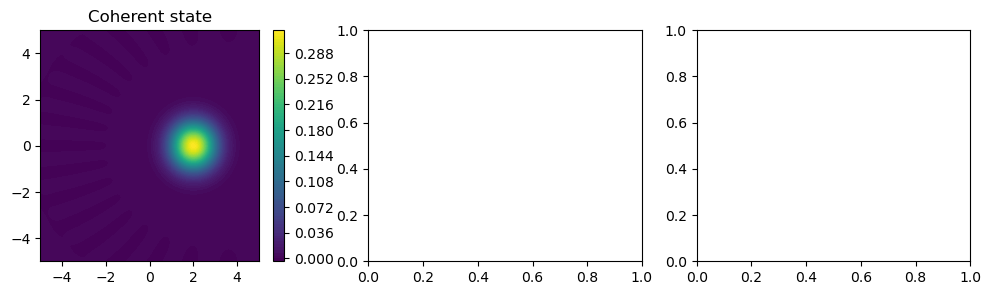

In [3]:
# Below we create the Wigner function using qtip and choose an x-space from -5 to 5 with 200 points

xvec = np.linspace(-5,5,200)

W_coherent = qt.wigner(rho_coherent_dm, xvec, xvec)

fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cbar = plt.colorbar(cont0)

plt.show()

##### We define the Wigner function. Below the coherent state is shifted by 45 degrees

In [4]:
N = 20

rho_coherent = qt.coherent(N, np.sqrt(2))

def rot(theta):
    return (1j*theta*qt.num(N)).expm()

# 1j is just i and rho_coherent is a vector (can be rotated as such)

W_coherent = qt.wigner(rot(mt.pi/4)*rho_coherent, xvec, xvec)


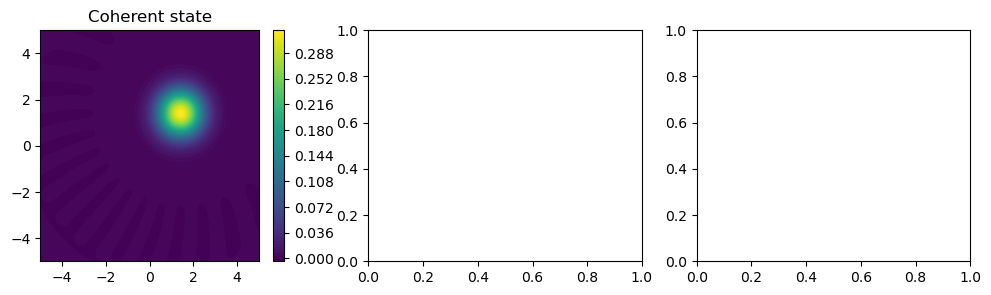

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cbar = plt.colorbar(cont0)

plt.show()

In [6]:
# We store the x-values for theta=45 in the variable x_45

x_45 = [np.sum(W_coherent[:,i]) for i in range(len(W_coherent[0]))]
x_45 = np.array(x_45)

##### We can do this process for different values of theta

In [65]:
num_thetas = [0,30,60,90,120,150,180]
thetas = [i*mt.pi/180 for i in num_thetas]

N_thetas = len(thetas)

W_coherents = [0]*N_thetas

# xs contains all the x values for different values of theta

xs = np.zeros((N_thetas,len(W_coherent[0])))

# The for loop below updates the xs array to contain the x-values (int over all p) at different angles

for i in range(N_thetas):
    W_coherents[i] = qt.wigner(rot(thetas[i])*rho_coherent, xvec, xvec)
    cohe = W_coherents[i]
    seq = np.array([np.sum(cohe[:,j]) * (xvec[1]-xvec[0])/20 for j in range(len(W_coherents[0][0]))])
    xs[i] = seq

##### Below, the values of p(x_theta) are shown for the different values of theta

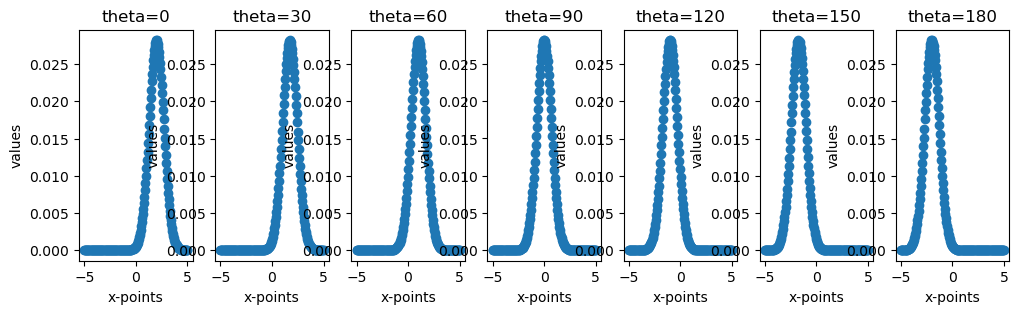

In [67]:
fig, axes = plt.subplots(1, 7, figsize=(12,3))

scat0 = axes[0].scatter(xvec, xs[0])
scat1 = axes[1].scatter(xvec, xs[1])
scat2 = axes[2].scatter(xvec, xs[2])
scat3 = axes[3].scatter(xvec, xs[3])
scat4 = axes[4].scatter(xvec, xs[4])
scat5 = axes[5].scatter(xvec, xs[5])
scat6 = axes[6].scatter(xvec, xs[6])

i = 0

for ax in axes.flat:
    ax.set(xlabel='x-points', ylabel='values', title='theta=' + str(num_thetas[i]))
    i+=1

plt.show()

##### Now that we have different probability distributions for x we can use the rejection sampling technique

In [68]:
# Random rejection sample function

def Rsamp(maxval, values, iter, theta):
    """values has to be an empty list
    theta is the given angle"""
    
    for j in range(iter):
        for i in range(len(xs[theta])):
            rand_y = random.uniform(0,maxval)
            rand_x = random.uniform(-5,5)
            if rand_y < xs[theta][int(rand_x)]:
                values.append(rand_x)
    return values

In [ ]:
# Random rejection sample function

def Rsamp(maxval, values, iter, theta):
    """values has to be an empty list
    theta is the given angle"""
    
    Ry = np.random.uniform(0,maxval,100)
    Rx = np.random.choice(xvec, 100)
    
    

    return values

In [ ]:
print(random.uniform(0,max(xs[0])))
print(np.random.choice(xvec, 100))
print(np.random.uniform(0,max(xs[0]),100))

In [26]:
rand_y = np.random.uniform(0, .3, 100)
#rand_x = np.random.uniform(-5,5, 100)
rand_x = np.random.choice(xs[0], 100)
#rand_xy = np.vstack([rand_x, rand_y]).T
rand_x[rand_y < p(rand_x)]
rand_x[rand_y < xs[0][index(rand_x, xs)]]


(200,)

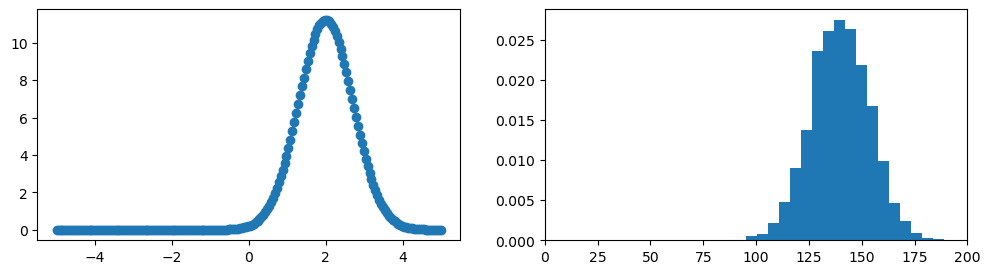

In [11]:
# This sampling method can be done with any of the probability distributions calculated above

thetas = np.array([0,1,2,3,4,5,6])

max_val = max(xs[0])
vals = []

# Number of iterations for the sample-gathering

iter = 100
num = 0

vals = Rsamp(max_val, vals, iter, thetas[num])

fig, axes = plt.subplots(1, 2, figsize=(12,3))

scat0 = axes[0].scatter(xvec, xs[num])
hist1 = axes[1].hist(vals,bins=20, density=True)

plt.xlim(0,200)
plt.show()

##### We use this method to have samples for all theta-values {0,30,60,90,120,150}

In [28]:
N_thetas = len(thetas)

samples_theta = []
lengths = []

iter = 100

# Since the length of the array depends on the sample, we make one large array
# and array lengths determines the index of the sample values

# e.g. theta=0 (index 0): samples_theta[0:lengths[0]]
# theta=30 (index 1): samples_theta[lengths[0]:lengths[1]]

for j in range(N_thetas):
    Rsamp(max_val,samples_theta,iter,j)
    length = len(samples_theta)
    lengths.append(length)

samples_theta = np.array(samples_theta)

# Definition of Likelyhood-function

In [29]:
# Definition of the likelyHood-function

def likelyHood(pr,f):
    product = 1.
    for j in range(len(f)):
        product *= pr[j]**f[j]
    return product

# Overlap function defined as eq. 8 in the paper

def overlap(n,theta,x):
    """x corresponds to yi (measurement values)"""
    thetas = [0,30,60,90,120,150]
    theta = thetas[theta]
    hermit = sp.special.hermite(n)
    overl = np.real(cm.exp(1j * n * theta)) * (2./mt.pi)**(1/4) * hermit(mt.sqrt(2)*x)
    overl = overl/(mt.sqrt(2**n * mt.factorial(n)))*mt.exp(-x**2)
    return overl

##### With the Likelyhood function we take as input a state operator (in this first case we know the state operator) and compute value. This value is largest for the correct state operator.

In [30]:
# We define theta_val to be a dynamic variable (choose the sample of theta=0,30,60,90,120,150 by index)

theta_val = 0

sample = np.histogram(samples_theta[theta_val:lengths[theta_val+1]],bins=100,density=True)

In [15]:
# fvals is our number of occurences

yjs = sample[1]
yjs = np.array(yjs)

fvals = sample[0]
fvals = np.array(fvals)

# Below we convert the density operator to numpy-format

rho_coherent_dm = rho_coherent_dm.full()
rho_coherent_dm = np.real(np.array(rho_coherent_dm))

# What we are doing here is that we are updating yjs to only include the midpoint value
# of each bin which matches the dimension of fvals (i.e. we have the same number of j's)

for i in range(len(yjs)):
    if i < len(yjs)-1:
        yjs[i] = yjs[i] + (yjs[i+1] - yjs[i])/2

yjs = np.delete(yjs,-1)

M = rho_coherent_dm.shape[0] # In our case the dimension of rho is 20 x 20
N = np.copy(M)

prjs = [i for i in range(len(fvals))]

In [22]:
print(yjs)

[ 67.58052052  68.88314574  70.18577096  71.48839619  72.79102141
  74.09364664  75.39627186  76.69889709  78.00152231  79.30414754
  80.60677276  81.90939798  83.21202321  84.51464843  85.81727366
  87.11989888  88.42252411  89.72514933  91.02777456  92.33039978
  93.633025    94.93565023  96.23827545  97.54090068  98.8435259
 100.14615113 101.44877635 102.75140157 104.0540268  105.35665202
 106.65927725 107.96190247 109.2645277  110.56715292 111.86977815
 113.17240337 114.47502859 115.77765382 117.08027904 118.38290427
 119.68552949 120.98815472 122.29077994 123.59340516 124.89603039
 126.19865561 127.50128084 128.80390606 130.10653129 131.40915651
 132.71178174 134.01440696 135.31703218 136.61965741 137.92228263
 139.22490786 140.52753308 141.83015831 143.13278353 144.43540875
 145.73803398 147.0406592  148.34328443 149.64590965 150.94853488
 152.2511601  153.55378533 154.85641055 156.15903577 157.461661
 158.76428622 160.06691145 161.36953667 162.6721619  163.97478712
 165.27741234

In [21]:
for k in range(len(prjs)):
    sum = 0
    for i in range(M):
        for j in range(N):
            seq = overlap(i,theta_val,yjs[k]) * overlap(j,theta_val,yjs[k]) * np.real(rho_coherent_dm[i][j])
            sum += seq
    print(sum)
    prjs[k] = sum

prjs = np.array(prjs)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


KeyboardInterrupt: 

In [ ]:
L = likelyHood(prjs,fvals)
print(L)

product = 1.
for j in range(len(fvals)):
    product *= prjs[j]**fvals[j]


0.0


## Ensemble that maximizes the likelyhood, L

In [ ]:
def MaxLik(f,pr,proj):
    sum = 0
    for i in range(len(f)):
        sum += f[i]/pr[i] * proj